# ***MILK QUALITY PREDICTION***

***IMPORTS***

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/milkquality/milknew.csv


***DATA COLLECTION***

***READING THE DATA FILES***

In [11]:
data=pd.read_csv('/kaggle/input/milkquality/milknew.csv')
data.head()  # displays the first five rows of the dataframe

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


***ANALYZING THE DATA***

In [12]:
data.shape  # returns a tuple of array dimension that specifies the number of rows and columns

(1059, 8)

In [13]:
data.info()  # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [14]:
data.describe().T  # returns the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


***DATA CLEANING***

***STEPS:***

**1. Analyze the numerical and categorical features, and convert categorical feature into numerical.**

In [15]:
data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

**2. Check for missing values and handle them.**

In [16]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

***EDA - EXPLORATORY DATA ANALYSIS***

***1.Univariate Non-Graphical***

**Check for outliers. If present try to handle them.**


<AxesSubplot:>

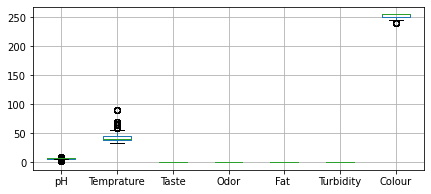

In [17]:
plt.figure(figsize=(7,3))
data.boxplot()

In [18]:
data.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
dtype: float64

**Skewness Reduction**

In [19]:
quantile1=data["Temprature"].quantile(0.25)
quantile2=data["Temprature"].quantile(0.75)

data["Temprature"]=np.where(data["Temprature"]<quantile1,quantile1,data["Temprature"])
data["Temprature"]=np.where(data["Temprature"]>quantile2,quantile2,data["Temprature"])

In [20]:
t = round(data['Temprature'].skew(),10)
print(t)

0.0129903439


In [21]:
quantile1=data["Colour"].quantile(0.25)
quantile2=data["Colour"].quantile(0.75)

data["Colour"]=np.where(data["Colour"]<quantile1,quantile1,data["Colour"])
data["Colour"]=np.where(data["Colour"]>quantile2,quantile2,data["Colour"])

In [22]:
c = round(data['Colour'].skew(),10)
print(c)

-0.4402211375


In [23]:
quantile1=data["pH"].quantile(0.25)
quantile2=data["pH"].quantile(0.75)

data["pH"]=np.where(data["pH"]<quantile1,quantile1,data["pH"])
data["pH"]=np.where(data["pH"]>quantile2,quantile2,data["pH"])

In [24]:
ph = round(data['pH'].skew(),10)
print(ph)

-0.1071831836


***2.Univariate Graphical***

<AxesSubplot:xlabel='Grade', ylabel='Count'>

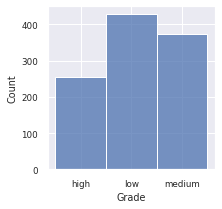

In [25]:
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.set(font_scale=0.8)
sns.histplot(data=data, x='Grade')

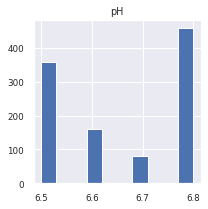

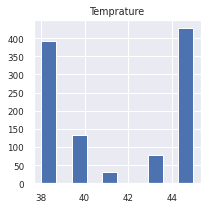

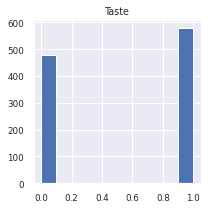

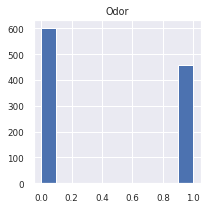

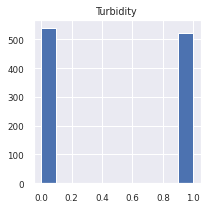

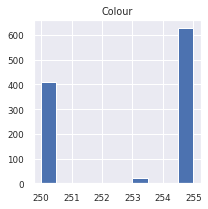

In [26]:
column=['pH','Temprature','Taste','Odor','Turbidity','Colour']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

***3.Multivariate Non-Graphical***

**Correlation**

In [27]:
correlation = data.corr()
correlation

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.449949,-0.041844,0.099582,0.025048,0.106425,-0.149502
Temprature,0.449949,1.000000,-0.137448,0.205074,0.066164,0.295024,-0.352096
Taste,-0.041844,-0.137448,1.000000,0.017582,0.324149,0.055755,-0.114639
Odor,0.099582,0.205074,0.017582,1.000000,0.314505,0.457935,-0.005736
Fat,0.025048,0.066164,0.324149,0.314505,1.000000,0.329264,0.034812
Turbidity,0.106425,0.295024,0.055755,0.457935,0.329264,1.000000,0.020945
Colour,-0.149502,-0.352096,-0.114639,-0.005736,0.034812,0.020945,1.000000


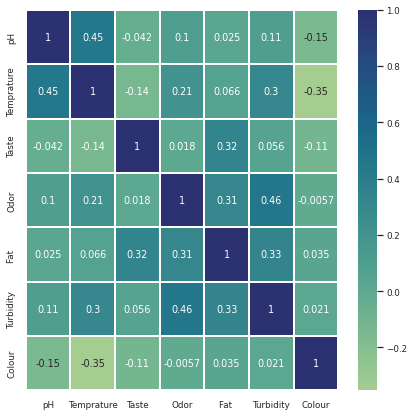

In [28]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

***4.Multivariate Graphical***

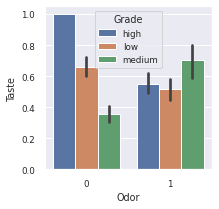

In [29]:
plt.figure(figsize=(3,3))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=data)
plt.show()

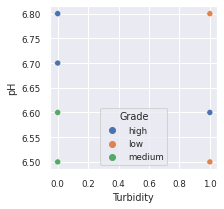

In [30]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=data)
plt.show()

***MODELLING***

In [31]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

In [32]:
from sklearn.model_selection import train_test_split
X=data.drop(['Grade'],axis=1)
y=data['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

**DECISION TREE**

In [33]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred=model.predict(X_test)
y_pred.shape

(318,)

In [35]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9088050314465409

**SUPPORT VECTOR MACHINE**

In [36]:
from sklearn.preprocessing import StandardScalar
standardscalar = StandardScalar()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_train)

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [37]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [38]:
y_predict= classifier.predict(X_test)
score=accuracy_score(y_test,y_predict)
print(score)

0.7484276729559748


**RANDOM FOREST CLASSIFICATION**

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 25  34  19]
 [  0 108  18]
 [  0   7 107]]


In [40]:
print(accuracy_score(y_test,prediction))

0.7547169811320755


**LOGISTIC REGRESSION**

In [41]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=1.0,random_state=2)
regressor.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=2)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[34 29 15]
 [22 68 36]
 [ 5 19 90]]


In [43]:
print(accuracy_score(y_test,prediction))

0.6037735849056604


**NAIVE BAYES**

In [44]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [45]:
y_pred=model.predict(X_test)
y_pred.shape

(318,)

In [46]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.44025157232704404